# Plagiarism detection using Natural Language Processing


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords 

In [10]:
def plagiarism(file):
    f=open('C:\\Users\\Rohil\\Desktop\\plagiarism\\corpus\\corpus-20090418\\'+file,"r",encoding="utf8")
    orig=f.read().replace("\n"," ")
    f.close()
    
    f2=open('C:\\Users\\Rohil\\Desktop\\plagiarism\\corpus\\corpus-20090418\\orig_taska.txt',"r",encoding="utf8")
    plag=f2.read().replace("\n"," ")
    f2.close()
    
    #word tokenisation
    tokens_o=word_tokenize(orig)
    tokens_p=word_tokenize(plag)
    
    #lowerCase
    tokens_o = [token.lower() for token in tokens_o]
    tokens_p = [token.lower() for token in tokens_p]
    
    #stop word removal
    #punctuation removal
    stop_words=set(stopwords.words('english'))
    punctuations=['"','.','(',')',',','?',';',':',"''",'``']
    filtered_tokens_o = [w for w in tokens_o if not w in stop_words and not w in punctuations]
    filtered_tokens_p = [w for w in tokens_p if not w in stop_words and not w in punctuations]
    
    
    #Trigram Similiarity measures
    trigrams_o=[]
    for i in range(len(filtered_tokens_o)-2):
        t=(filtered_tokens_o[i],filtered_tokens_o[i+1],filtered_tokens_o[i+2])
        trigrams_o.append(t)
    
    
    s=0
    trigrams_p=[]
    for i in range(len(filtered_tokens_p)-2):
        t=(filtered_tokens_p[i],filtered_tokens_p[i+1],filtered_tokens_p[i+2])
        trigrams_p.append(t)
        if t in trigrams_o:
            s+=1
    
       
        
    #jaccord coefficient = (S(o)^S(p))/(S(o) U S(p))
    J=(s/(len(list(set(trigrams_o) | set(trigrams_p))))*100) 
    
    #containment measure
    C=(s/len(trigrams_p)*100)
    
    
    #longest common subsequence
    #dynamic programming algorithm for finding lcs
    def lcs(l1,l2):
        s1=word_tokenize(l1)
        s2=word_tokenize(l2)
        # storing the dp values 
        dp = [[None]*(len(s1)+1) for i in range(len(s2)+1)] 
      
        for i in range(len(s2)+1): 
            for j in range(len(s1)+1): 
                if i == 0 or j == 0: 
                    dp[i][j] = 0
                elif s2[i-1] == s1[j-1]: 
                    dp[i][j] = dp[i-1][j-1]+1
                else: 
                    dp[i][j] = max(dp[i-1][j] , dp[i][j-1]) 
        return dp[len(s2)][len(s1)] 
    
    
    sent_o=sent_tokenize(orig)
    sent_p=sent_tokenize(plag)
    
    #maximum length of LCS for a sentence in suspicious text
    max_lcs=0
    sum_lcs=0
    
    for i in sent_p:
        for j in sent_o:
            l=lcs(i,j)
            max_lcs=max(max_lcs,l)
        sum_lcs+=max_lcs
        max_lcs=0
    
    
    score=(sum_lcs/len(tokens_p)*100)
    return J,C,score
    


In [11]:
files = ["g0pA_taska.txt","g0pB_taska.txt","g0pC_taska.txt","g0pD_taska.txt","g0pE_taska.txt"]
j = []
c = []
scores = []
for f in files:
    result = plagiarism(f)
    j.append(result[0])
    c.append(result[1])
    scores.append(result[2])    


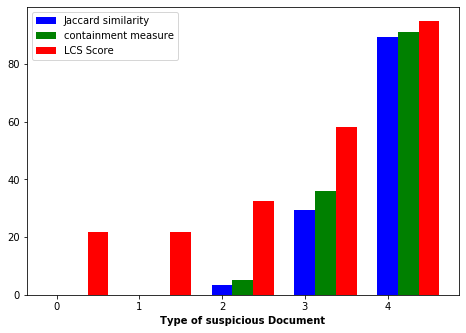

In [12]:
"""
We evaluate all the scores on the documents in the dataset. 
There are three types of documents: near copy, lightly revised and heavily revised. 
The three scores obtained are as shown below.
"""
import numpy as np
import matplotlib.pyplot as plt
data = [j,c,scores]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,label='Jaccard similarity')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25,label='containment measure')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25,label='LCS Score')
plt.xlabel('Type of suspicious Document', fontweight='bold')
plt.legend()
plt.show()
#We can observe that all the scores have higher values for highly plagiarised documents.